# K-Nearest Neighbours (KNN) Algorithm Implementation :

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Plot style changing to 'seaborn'

plt.style.use('seaborn')

In [3]:
# Importing the Data xdata and ydata

dfx = pd.read_csv('./KNN Datasets/xdata.csv')
dfy = pd.read_csv('./KNN Datasets/ydata.csv')

print(dfx.shape, dfx, dfy.shape, dfy, sep='\n\n')

(399, 3)

       0  3.4821055700010444  2.4203917879404533
0      1            3.516279            3.719750
1      2            4.606496            3.414379
2      3            4.677011            3.047244
3      4            4.157725            3.138677
4      5            3.154431            3.619858
..   ...                 ...                 ...
394  395            1.389231            2.592584
395  396           -0.352768            0.136461
396  397            0.789626            0.931670
397  398           -1.002530           -0.676162
398  399            0.292387            0.561178

[399 rows x 3 columns]

(399, 2)

       0  0.0
0      1  0.0
1      2  0.0
2      3  0.0
3      4  0.0
4      5  0.0
..   ...  ...
394  395  1.0
395  396  1.0
396  397  1.0
397  398  1.0
398  399  1.0

[399 rows x 2 columns]


In [4]:
# let's generate numpy arrays of the DataFrames

X = dfx.values
Y = dfy.values

print(X.shape, X, Y.shape, Y, sep='\n\n')

(399, 3)

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]

(399, 2)

[[  1.   0.]
 [  2.   0.]
 [  3.   0.]
 [  4.   0.]
 [  5.   0.]
 [  6.   0.]
 [  7.   0.]
 [  8.   0.]
 [  9.   0.]
 [ 10.   0.]
 [ 11.   0.]
 [ 12.   0.]
 [ 13.   0.]
 [ 14.   0.]
 [ 15.   0.]
 [ 16.   0.]
 [ 17.   0.]
 [ 18.   0.]
 [ 19.   0.]
 [ 20.   0.]
 [ 21.   0.]
 [ 22.   0.]
 [ 23.   0.]
 [ 24.   0.]
 [ 25.   0.]
 [ 26.   0.]
 [ 27.   0.]
 [ 28.   0.]
 [ 29.   0.]
 [ 30.   0.]
 [ 31.   0.]
 [ 32.   0.]
 [ 33.   0.]
 [ 34.   0.]
 [ 35.   0.]
 [ 36.   0.]
 [ 37.   0.]
 [ 38.   0.]
 [ 39.   0.]
 [ 40.   0.]
 [ 41.   0.]
 [ 42.   0.]
 [ 43.   0.]
 [ 44.   0.]
 [ 45.   0.]
 [ 46.   0.]
 [ 47.   0.]
 [ 48.   0.]
 [ 49.   0.]
 [ 50.   0.]
 [ 51.   0.]
 [ 5

In [5]:
# We have serial numbers in 1st column which we don't want , so we drop the first column and similarly for y also

X = X[:, 1:]
Y = Y[:, 1:].reshape((-1,))

print(X.shape, X, Y.shape, Y, sep='\n\n')

(399, 2)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038  3.3

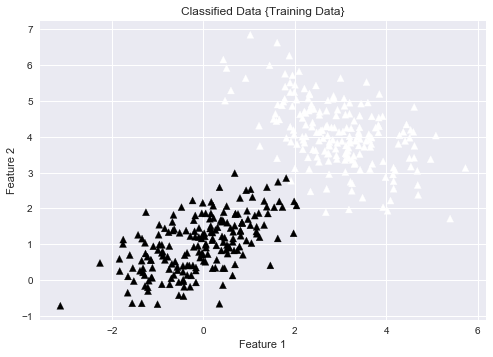

In [6]:
# Plotting the Data with classes {0 or 1} from the label(y) according to their features

plt.scatter(X[:,0], X[:,1], c=Y, marker='^')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classified Data {Training Data}')
plt.show()

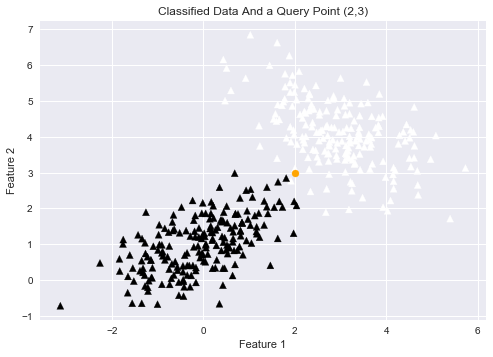

In [7]:
# Generating query point and making predictions

query_x = np.array([2, 3])
plt.scatter(X[:, 0], X[:, 1], c=Y, marker='^')
plt.scatter(query_x[0], query_x[1], color='orange')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classified Data And a Query Point (2,3)')
plt.show()

### Now, We will find out the prediction for the query point

In [8]:
# dist() function to calculate the distance between two numpy arrays (here, x1 and x2) - Euclidean distance

def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [9]:
# KNN Algorithm

def knn(X, Y, queryPoint, k=5):
    
    # Find out the K nearest neighbours
    vals = []
    m = X.shape[0]
    
    # 1st for each point in the X calculating the distance and put it and its class (0 or 1) into vals
    for i in range(m):
        d = dist(queryPoint, X[i])     # computing the distance
        vals.append((d, Y[i]))
    
    # Sorting the list according to the distances
    vals = sorted(vals)
    
    # Nearest/First K points
    vals = vals[:k]                 
    
    # Creating numpy array of the nearest K points
    vals = np.array(vals)
    
    # For Majority Vote {major no. of points class (0 or 1)}
    # We are using unique; here, it will create an array with unique values from an array
    # And, return_counts=True will gives the count of each value {the whole statement will create an array containing 2 arrays}
    
    new_vals = np.unique(vals[:, 1], return_counts=True)
    
    # new_vals[1] will give the 2nd array inside new_vals array i.e., the count array
    # And argmax() will give the index of the maximum count
    index = new_vals[1].argmax()
    pred = new_vals[0][index]        # We are mapping the value {In unique values array} with the index of max count value
    
    return pred

In [10]:
# Testing Our Algorithm with some query_points

print('Predictions of some query points :\n')
print('For point (2,3) class will be', knn(X,Y,[2,3]))
print('For point (-2,0) class will be', knn(X,Y,[-2,0]))
print('For point (2,2.5) class will be', knn(X,Y,[2,2.5]))
print('For point (3,2.10) class will be', knn(X,Y,[3,2.10]))
print('For point (0.2,3.5) class will be', knn(X,Y,[0.2,3.5]))

Predictions of some query points :

For point (2,3) class will be 0.0
For point (-2,0) class will be 1.0
For point (2,2.5) class will be 1.0
For point (3,2.10) class will be 0.0
For point (0.2,3.5) class will be 1.0


## Geting the Accuracy of the Algorithm in the given Data Set

In [11]:
# Lets split the Data in 2:8 ratio from the whole data X and Y
# 8 parts for the training data and 2 parts for the testing data

split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split, :]
Y_train = Y[:split]

X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, X_train, Y_train.shape, Y_train, sep='\n\n')
print(X_test.shape, X_test, Y_test.shape, Y_test, sep='\n\n')

319
(319, 2)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038 

In [12]:
# get_acc() : accuracy function to get the accuracy of the predictions

def get_acc(X, Y, X_test, Y_test):
    
    y_pred = []
    
    for i in range(Y_test.shape[0]):
        p = knn(X, Y, X_test[i])
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred == Y_test).sum())/Y_test.shape[0]

In [13]:
# Getting the Accuracy of the Algorithm for the given dataset

print('Accuracy :', get_acc(X_train, Y_train, X_test, Y_test)*100.0, '%')

Accuracy : 100.0 %
